In [1]:
import numpy as np 
try:
    import matplotlib
    matplotlib.rcParams['text.usetex'] = True
except:
    pass
import matplotlib.pyplot as plt
import dcs.localEquilibrium 
import dcs.vmec
from dcs.toroidalField import normalize

In [2]:
surfField_DIIID = dcs.localEquilibrium.ArbitrarySurfaceField.readVMEC("wout_DIII-D.nc") 

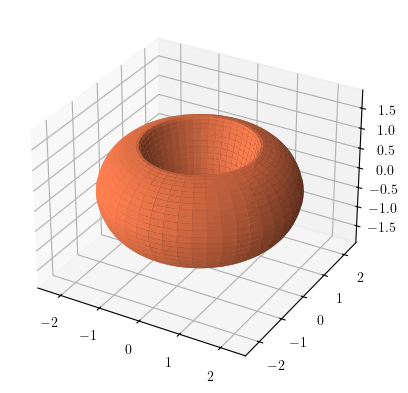

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
_ = surfField_DIIID.surf.plot_plt(fig=fig, ax=ax)

In [4]:
surfField_DIIID.solveJacobian()

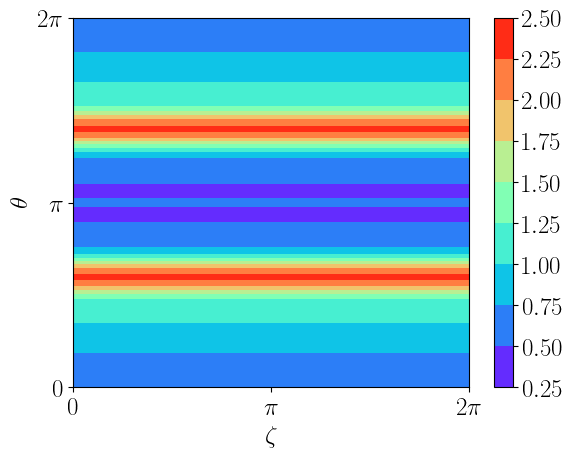

In [5]:
fig, ax = plt.subplots()
surfField_DIIID.Jacobian.plot_plt(ax=ax, fig=fig)

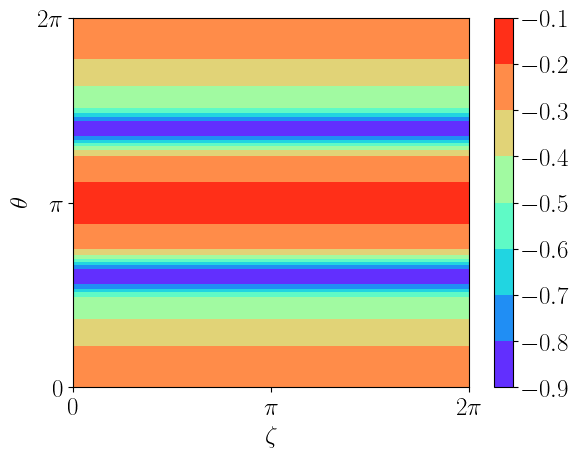

In [6]:
vmecJacobian = dcs.vmec.VMECOut("wout_DIII-D.nc").getJacobian()

fig, ax = plt.subplots()
vmecJacobian.plot_plt(ax=ax, fig=fig)

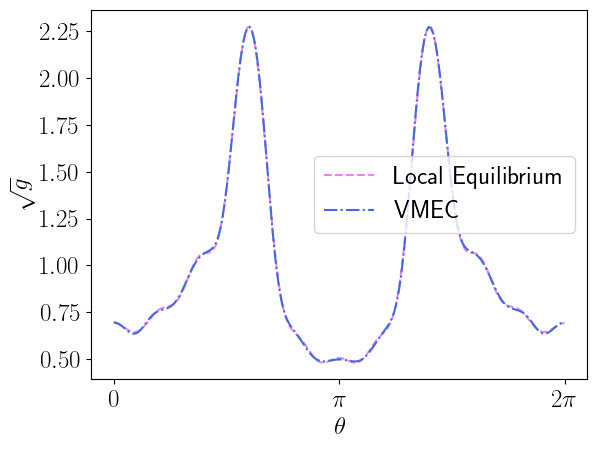

In [7]:
fig, ax = plt.subplots()
ax.plot(
    np.linspace(0,2*np.pi,200), 
    normalize(surfField_DIIID.Jacobian).getValue(np.linspace(0,2*np.pi,200),np.ones(200)*0).flatten(), 
    c = "violet", 
    ls = "--", 
    label = "Local Equilibrium"
)
ax.plot(
    np.linspace(0,2*np.pi,200), 
    normalize(vmecJacobian).getValue(np.linspace(0,2*np.pi,200),np.ones(200)*0).flatten(),
    c = "royalblue", 
    ls = "-.", 
    label = "VMEC"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$\theta$", fontsize=18)
ax.set_ylabel(r"$\sqrt{g}$", fontsize=18)
ax.set_xticks(np.linspace(0, 2*np.pi, 3))
ax.set_xticklabels(["$0$", r"$\pi$", r"$2\pi$"], fontsize=18)
_ = plt.yticks(fontsize=18)